In [23]:
import pandas as pd
import numpy as np
from scipy import stats

In [24]:
data=pd.read_csv(r"../input/lumpy-skin-disease-dataset/Lumpy skin disease data.csv")
data.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [25]:
data=data.drop(['region','country','reportingDate'],axis=1)
data.head()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   cld                  24803 non-null  float64
 3   dtr                  24803 non-null  float64
 4   frs                  24803 non-null  float64
 5   pet                  24803 non-null  float64
 6   pre                  24803 non-null  float64
 7   tmn                  24803 non-null  float64
 8   tmp                  24803 non-null  float64
 9   tmx                  24803 non-null  float64
 10  vap                  24803 non-null  float64
 11  wet                  24803 non-null  float64
 12  elevation            24803 non-null  int64  
 13  dominant_land_cover  24803 non-null  int64  
 14  X5_Ct_2010_Da        24803 non-null  float64
 15  X5_Bf_2010_Da        24803 non-null 

In [27]:
data.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [28]:
data.duplicated()
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23726 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    23726 non-null  float64
 1   y                    23726 non-null  float64
 2   cld                  23726 non-null  float64
 3   dtr                  23726 non-null  float64
 4   frs                  23726 non-null  float64
 5   pet                  23726 non-null  float64
 6   pre                  23726 non-null  float64
 7   tmn                  23726 non-null  float64
 8   tmp                  23726 non-null  float64
 9   tmx                  23726 non-null  float64
 10  vap                  23726 non-null  float64
 11  wet                  23726 non-null  float64
 12  elevation            23726 non-null  int64  
 13  dominant_land_cover  23726 non-null  int64  
 14  X5_Ct_2010_Da        23726 non-null  float64
 15  X5_Bf_2010_Da        23726 non-null 

In [29]:
z = np.abs(stats.zscore(data['cld']))
print(z)

0        0.884949
1        0.941290
2        1.617371
3        0.695442
4        1.028361
           ...   
24798    0.508188
24799    0.508188
24800    0.508188
24801    0.508188
24802    0.441604
Name: cld, Length: 23726, dtype: float64


In [30]:
out=np.where(z>3)[0]
print('cld'+ " "+str(out))
data['cld']=data['cld'].drop(out)

cld [17665]


In [31]:
z = np.abs(stats.zscore(data['dtr']))
out=np.where(z>3)[0]
print('dtr'+ " "+str(out))
data['dtr']=data['dtr'].drop(out)

dtr [17840 17841 17842 17843 17856 17857 17858 17859 17872 17873 17874 17875
 17889 19403 19437 19438 19441 19442 19443 19444 19472 19473 19474 19475
 19476 19477 19478 19479 19480 19481 19510 19609 19610 19664 19665 19827
 20683 20691 20697 22055 22056 22057 22100 22101 22102 22103 22144 22145
 22146 22147 22148 22187 22188 22189 22190 22191 22192 22233 22234 22235
 22236 22237 22238 22279 22280 22281 22282 22283 22284 22324 22325 22326
 22327 22328 22329 22371 22372 22373 22374 22375 22420 22421 22422 22423
 22470 22471]


In [32]:
z = np.abs(stats.zscore(data['frs']))
out=np.where(z>3)[0]
print('frs'+ " "+str(out))
data['frs']=data['frs'].drop(out)

frs []


In [33]:
z = np.abs(stats.zscore(data['tmn']))
out=np.where(z>3)[0]
print('tmn'+ " "+str(out))
data['tmn']=data['tmn'].drop(out)

tmn []


In [34]:
z = np.abs(stats.zscore(data['tmp']))
out=np.where(z>3)[0]
print('tmp'+ " "+str(out))
data['tmp']=data['tmp'].drop(out)

tmp []


In [35]:
z = np.abs(stats.zscore(data['tmx']))
out=np.where(z>3)[0]
print('tmx'+ " "+str(out))
data['tmx']=data['tmx'].drop(out)

tmx []


In [36]:
z = np.abs(stats.zscore(data['wet']))
out=np.where(z>3)[0]
print('wet'+ " "+str(out))
data['wet']=data['wet'].drop(out)

wet [23240 23255 23256]


In [37]:
z = np.abs(stats.zscore(data['dominant_land_cover']))
out=np.where(z>3)[0]
print('dominant_land_cover'+ " "+str(out))
data['dominant_land_cover']=data['dominant_land_cover'].drop(out)

dominant_land_cover []


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23726 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    23726 non-null  float64
 1   y                    23726 non-null  float64
 2   cld                  23725 non-null  float64
 3   dtr                  23640 non-null  float64
 4   frs                  23726 non-null  float64
 5   pet                  23726 non-null  float64
 6   pre                  23726 non-null  float64
 7   tmn                  23726 non-null  float64
 8   tmp                  23726 non-null  float64
 9   tmx                  23726 non-null  float64
 10  vap                  23726 non-null  float64
 11  wet                  23723 non-null  float64
 12  elevation            23726 non-null  int64  
 13  dominant_land_cover  23726 non-null  int64  
 14  X5_Ct_2010_Da        23726 non-null  float64
 15  X5_Bf_2010_Da        23726 non-null 

In [39]:
data=data.fillna(method='bfill')
data.isnull().sum()

x                      0
y                      0
cld                    0
dtr                    0
frs                    0
pet                    0
pre                    0
tmn                    0
tmp                    0
tmx                    0
vap                    0
wet                    0
elevation              0
dominant_land_cover    0
X5_Ct_2010_Da          0
X5_Bf_2010_Da          0
lumpy                  0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23726 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    23726 non-null  float64
 1   y                    23726 non-null  float64
 2   cld                  23726 non-null  float64
 3   dtr                  23726 non-null  float64
 4   frs                  23726 non-null  float64
 5   pet                  23726 non-null  float64
 6   pre                  23726 non-null  float64
 7   tmn                  23726 non-null  float64
 8   tmp                  23726 non-null  float64
 9   tmx                  23726 non-null  float64
 10  vap                  23726 non-null  float64
 11  wet                  23726 non-null  float64
 12  elevation            23726 non-null  int64  
 13  dominant_land_cover  23726 non-null  int64  
 14  X5_Ct_2010_Da        23726 non-null  float64
 15  X5_Bf_2010_Da        23726 non-null 

In [41]:
data.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.00000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000,23726.000000
mean,81.650640,46.713851,58.878049,9.186369,24.323759,0.790706,23.66997,-16.532134,-11.925200,-7.341225,3.606567,8.429518,165.048639,4.462109,607.376686,177.387344,0.082694
std,42.662488,19.523079,19.524745,3.020401,11.445471,1.191336,31.18951,17.584537,18.034221,18.631599,4.988081,6.294418,19.667688,2.428974,2306.953489,1151.199706,0.275425
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.00000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,47.937766,34.750000,43.100000,6.900000,24.030000,0.000000,5.50000,-31.000000,-26.300000,-21.500000,0.400000,2.800000,152.000000,3.000000,2.297115,0.000000,0.000000
50%,82.750000,49.750000,61.400000,8.300000,31.000000,0.200000,13.80000,-20.300000,-15.300000,-10.800000,1.300000,7.710000,161.000000,4.000000,33.212788,0.000219,0.000000
75%,111.250000,62.250000,74.800000,11.300000,31.000000,1.100000,29.80000,-2.900000,0.700000,4.300000,4.600000,12.787500,176.000000,4.000000,301.749631,0.002289,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.90000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [42]:
data.head()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [43]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min()) 
data.head()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,0.751407,0.463232,0.421479,0.580645,0.000000,0.306667,0.004972,0.852632,0.877285,0.864764,0.548951,0.000000,0.442623,0.181818,0.167102,0.065162,1.0
1,0.744381,0.468206,0.410334,0.607527,0.000000,0.320000,0.000000,0.859211,0.886423,0.877171,0.569930,0.000000,0.431694,0.181818,0.149733,0.011849,1.0
2,0.737218,0.473848,0.276596,0.623656,0.002581,0.306667,0.001755,0.809211,0.839426,0.833747,0.454545,0.031695,0.502732,0.181818,0.036075,0.025185,1.0
3,0.726883,0.657305,0.458967,0.580645,1.000000,0.053333,0.025739,0.389474,0.417755,0.428040,0.031469,0.150065,0.612022,0.181818,0.004545,0.000000,1.0
4,0.725761,0.656878,0.393110,0.602151,1.000000,0.053333,0.030711,0.417105,0.447781,0.459057,0.041958,0.054657,0.650273,0.272727,0.001615,0.000000,1.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23726 entries, 0 to 24802
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    23726 non-null  float64
 1   y                    23726 non-null  float64
 2   cld                  23726 non-null  float64
 3   dtr                  23726 non-null  float64
 4   frs                  23726 non-null  float64
 5   pet                  23726 non-null  float64
 6   pre                  23726 non-null  float64
 7   tmn                  23726 non-null  float64
 8   tmp                  23726 non-null  float64
 9   tmx                  23726 non-null  float64
 10  vap                  23726 non-null  float64
 11  wet                  23726 non-null  float64
 12  elevation            23726 non-null  float64
 13  dominant_land_cover  23726 non-null  float64
 14  X5_Ct_2010_Da        23726 non-null  float64
 15  X5_Bf_2010_Da        23726 non-null 

In [45]:
df = pd.DataFrame(data)

# Export the Pandas DataFrame to a CSV file.
df.to_csv('dataset.csv', index=False)


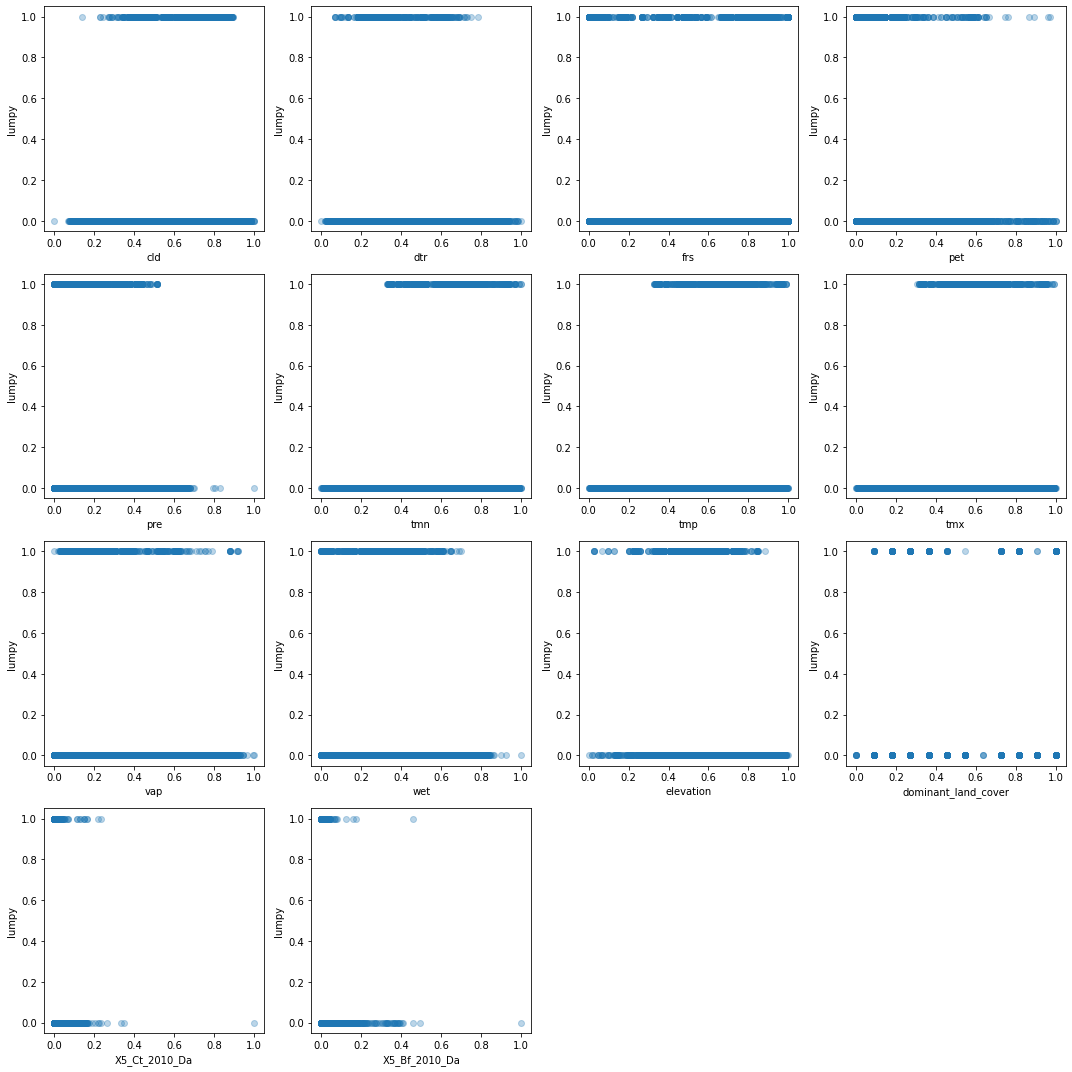

In [46]:
import matplotlib.pyplot as plt
import pandas as pd


features_to_plot = [col for col in df.columns if col not in ['x', 'y', 'lumpy']]


plt.figure(figsize=(15, 15))

# Create separate scatterplots for each feature against 'lumpy'
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 4, i)  
    plt.scatter(df[feature], df['lumpy'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('lumpy')

plt.tight_layout()  
plt.show()


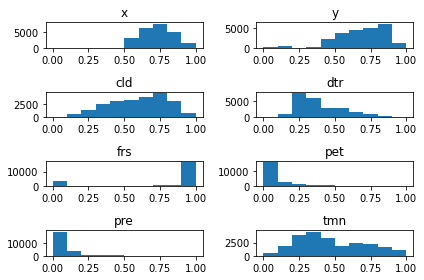

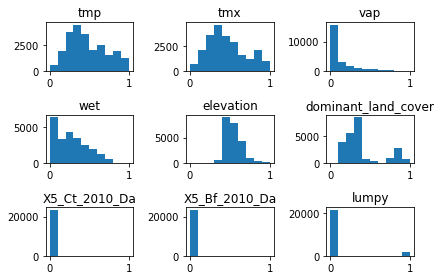

In [47]:

# Create a subplot grid with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2)

# Create a histogram of each feature in a separate subplot
for i in range(4):
    for j in range(2):
        feature = df.columns[i * 2 + j]
        axes[i, j].hist(df[feature])
        axes[i, j].set_title(feature)

# Tighten the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


remaining_columns = list(df.columns[8:])


num_features = len(remaining_columns)
num_rows = int(num_features ** 0.5)
num_cols = int(num_features / num_rows)

fig, axes = plt.subplots(num_rows, num_cols)


for i in range(num_rows):
    for j in range(num_cols):
        feature = remaining_columns[i * num_cols + j]
        axes[i, j].hist(df[feature])
        axes[i, j].set_title(feature)


plt.tight_layout()


plt.show()

In [48]:
x = data.iloc[:,:-1]
y = data.iloc[: ,-1]
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
24798    0.0
24799    0.0
24800    0.0
24801    0.0
24802    0.0
Name: lumpy, Length: 23726, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(21353, 16)
(21353,)
(2373, 16)
(2373,)


In [50]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf',gamma=8)
svc_model.fit(x_train, y_train)

SVC(gamma=8)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= svc_model .predict(x_train)
percentage=svc_model.score(x_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_model .predict(x_test)
percentage=svc_model.score(x_test,y_test)
res=confusion_matrix(y_test,predictions)
print("validation confusion matrix")
print(res)

print('training accuracy = '+str(svc_model.score(x_train, y_train)*100))
print('testing accuracy = '+str(svc_model.score(x_test, y_test)*100))

Training confusion matrix
[[19343   244]
 [  452  1314]]
validation confusion matrix
[[2148   29]
 [  51  145]]
training accuracy = 96.74050484709409
testing accuracy = 96.62873999157185


In [58]:
x_test.columns, x_test.shape

(Index(['x', 'y', 'cld', 'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap',
        'wet', 'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da',
        'X5_Bf_2010_Da'],
       dtype='object'),
 (2373, 16))

In [57]:
x_test

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da
823,0.555364,0.634104,0.720365,0.338710,0.397742,0.120000,0.303598,0.713158,0.708877,0.677419,0.241259,0.359314,0.568306,0.181818,9.146893e-03,0.000000e+00
22021,0.585535,0.497738,0.287741,0.784946,0.175161,0.440000,0.000585,0.751316,0.801567,0.816377,0.262238,0.000000,0.546448,0.818182,2.249352e-04,0.000000e+00
22033,0.577191,0.493213,0.245187,0.758065,0.168710,0.360000,0.002632,0.752632,0.798956,0.811414,0.265734,0.000000,0.546448,0.818182,1.635242e-04,0.000000e+00
8469,0.752434,0.855204,0.843972,0.225806,1.000000,0.013333,0.081018,0.269737,0.255875,0.233251,0.013986,0.647801,0.590164,0.363636,4.327112e-05,2.593621e-09
21436,0.732962,0.429864,0.253293,0.521505,0.000000,0.426667,0.002340,0.886842,0.903394,0.883375,0.629371,0.004204,0.612022,0.363636,2.836833e-02,1.267369e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13626,0.798331,0.769231,0.667680,0.413978,1.000000,0.000000,0.021936,0.193421,0.203655,0.204715,0.010490,0.146184,0.562842,0.363636,1.159016e-04,4.889261e-10
22343,0.819193,0.624434,0.209726,0.516129,1.000000,0.120000,0.000000,0.423684,0.443864,0.445409,0.000000,0.004528,0.699454,0.272727,3.746638e-03,0.000000e+00
19981,0.757997,0.579186,0.390071,0.639785,1.000000,0.106667,0.001755,0.364474,0.400783,0.418114,0.000000,0.025873,0.836066,0.272727,5.712671e-04,0.000000e+00
19223,0.553547,0.045249,0.470111,0.666667,0.000000,0.746667,0.157941,0.936842,0.971279,0.964020,0.573427,0.307245,0.633880,0.272727,4.735762e-04,0.000000e+00


In [56]:
y_test

823      1.0
22021    0.0
22033    0.0
8469     0.0
21436    0.0
        ... 
13626    0.0
22343    0.0
19981    0.0
19223    0.0
6896     0.0
Name: lumpy, Length: 2373, dtype: float64

In [62]:
# For this sample data prediction is 1
sample_data = pd.DataFrame([[0.555364, 0.634104, 0.720365, 0.338710, 0.397742, 0.120000, 0.303598, 0.713158, 0.708877, 0.677419, 0.241259, 0.359314, 0.568306, 0.181818, 9.146893e-03, 0.000000e+00]])
sample_data.shape

(1, 16)

In [68]:
sample_prediction = svc_model.predict(sample_data)
print(sample_prediction)

[1.]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [72]:
if sample_prediction[0]==1:
    print("Yes")
else:
    print("NO")

Yes


In [76]:
import joblib 

file_name = "lumpy_model.sav"

joblib.dump(svc_model, file_name)

['lumpy_model.sav']

In [77]:
loadded_model = joblib.load(file_name)

loadded_model.predict(sample_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([1.])

In [64]:
# from sklearn.metrics import roc_curve, auc


# predictions_train = svc_model.predict(x_train)
# predictions_test = svc_model.predict(x_test)


# def calculate_roc_auc(y_true, y_pred):
#     fpr, tpr, thresholds = roc_curve(y_true, y_pred)
#     roc_auc = auc(fpr, tpr)
#     return fpr, tpr, thresholds, roc_auc


# fpr_train, tpr_train, thresholds_train, roc_auc_train = calculate_roc_auc(y_train, predictions_train)


# fpr_test, tpr_test, thresholds_test, roc_auc_test = calculate_roc_auc(y_test, predictions_test)


# print('Training ROC AUC score:', roc_auc_train)
# print('Test ROC AUC score:', roc_auc_test)


In [65]:
# from sklearn.metrics import roc_curve, auc, precision_recall_curve
# fpr, tpr, thresholds = roc_curve(y_test, predictions_test)
# roc_auc = auc(fpr, tpr)

# precision, recall, _ = precision_recall_curve(y_test, predictions_test)


# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()


# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.show()